In [ ]:
<h1 align="center"> Machine Learning: Assignment 3</h1><br>

In [3]:
%matplotlib inline
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import os 
import sklearn
import seaborn as sns

import numpy as np
import time
import csv
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, ExtraTreesClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import svm, neighbors
import itertools as it
import pandas as pd

#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning) 

<h2 align="center"> Problem 1 Kaggle Titanic</h2><br>

<strong><p style="font-size:120%;"></strong> Train decision tree, forests of randomized trees and Boosting trained on the Titanic Data Set. Perform and plot the decision surface for each. Don’t forget to perform data prep. (Hint: Kaggle has a nice description­ https://www.kaggle.com/c/titanic).
Perform feature importance analysis and plot histogram before the training. Several different configuration of each of the models/parameters should be explored, analyzed and plotted. Demonstrate how changes in parameters influences accuracy for different algorithms. Describe your process of parameter tuning and provide in detailed discussion of the results.

In [129]:
import pandas as pd
 
# read in the training and testing data into Pandas.DataFrame objects
train = pd.read_csv('data/titanic/train.csv', header=0)
#submit_df  = pd.read_csv('data/titanic/test.csv',  header=0)
train
# merge the two DataFrames into one
#df = pd.concat([input_df, submit_df])
 
# re-number the combined data set so there aren't duplicate indexes
#df.reset_index(inplace=True)
 
# reset_index() generates a new column that we don't want, so let's get rid of it
#df.drop('index', axis=1, inplace=True)
 
# the remaining columns need to be reindexed so we can access the first column at '0' instead of '1'
#df = df.reindex_axis(input_df.columns, axis=1)
 
#print df.shape[1], "columns:", df.columns.values
#print "Row count:", df.shape[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [77]:
#pd.get_dummies(df['Cabin'])

In [128]:
#pd.get_dummies(df['Cabin'])
#lama = pd.DataFrame(data = df['Cabin'])
#lama.info()
#df[df.Cabin.isnull() == False][['Survived', 'Cabin']].hist()
cabinDF = train[train.Cabin.isnull() == False]
#survive = pd.get_dummies(lama['Cabin'])
#cabins = pd.get_dummies(lama['Cabin'])
#cabins.columns.str.startswith('A')
#cabins.columns

#cabinDF.ix[cabinDF.Cabin.str.startswith('F')].Survived.hist()
#cabinDF
#lama.ix[lama.Cabin.str.startswith('A') == True]['Survived'].hist()
cabinDF.Cabin.unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90

In [6]:
### Populate missing ages  using RandomForestClassifier
def setMissingAges(df):
    
    # Grab all the features that can be included in a Random Forest Regressor
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp', 'Pclass']]
    
    # Split into sets with known and unknown Age values
    knownAge = age_df.loc[ (df.Age.notnull()) ]
    unknownAge = age_df.loc[ (df.Age.isnull()) ]
    
    # All age values are stored in a target array
    y = knownAge.values[:, 0]
    
    # All the other values are stored in the feature array
    X = knownAge.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(unknownAge.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df


In [7]:
setMissingAges(df)

ValueError: could not convert string to float: S

In [31]:
def all_combinations(coll):
    return reduce(lambda acc, x: acc + list(it.combinations(coll, x)), range(1, len(coll) + 1), [])

def right_justify(s):
    return "%45s" % str(s)

train_df = pd.read_csv("data/titanic/train.csv")
train_df["Sex"] = train_df["Sex"].apply(lambda sex: 0 if sex == "male" else 1)
train_df["Embarked"] = train_df["Embarked"].apply(lambda port: 0 if port == "S" else 1 if port == "C" else 2)

meanAge=np.mean(train_df.Age)
train_df.Age=train_df.Age.fillna(meanAge)
train_df.Cabin = train_df.Cabin.fillna('Unknown')

n_samples = len(train_df)

rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=1, random_state=0)
knn = neighbors.KNeighborsClassifier(weights='distance')
support_vector_machine = svm.SVC(gamma=0.001)
et = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=1, random_state=0)

all_columns = ["Fare", "Sex", "Pclass", 'Embarked', "Age"]


for columns in all_combinations(all_columns):
    labels = train_df["Survived"].values
    features = train_df[list(columns)].values

    rf_score = cross_val_score(rf, features, labels, n_jobs=-1).mean()
    et_score = cross_val_score(et, features, labels, n_jobs=-1).mean()
    svm_score = cross_val_score(support_vector_machine, features, labels, n_jobs=-1).mean()
    knn_score = cross_val_score(knn, features, labels, n_jobs=-1).mean()
    columns = right_justify(columns)

    print("{0} -> {5} (RF: {1}, ET: {2}, SVM: {3}, KNN: {4})".format(columns, rf_score, et_score, svm_score, knn_score, max([rf_score, et_score, svm_score, knn_score])))

                                    ('Fare',) -> 0.693602693603 (RF: 0.693602693603, ET: 0.68911335578, SVM: 0.652076318743, KNN: 0.667789001122)
                                     ('Sex',) -> 0.786756453423 (RF: 0.786756453423, ET: 0.786756453423, SVM: 0.616161616162, KNN: 0.786756453423)
                                  ('Pclass',) -> 0.679012345679 (RF: 0.679012345679, ET: 0.679012345679, SVM: 0.616161616162, KNN: 0.565656565657)
                                ('Embarked',) -> 0.636363636364 (RF: 0.636363636364, ET: 0.636363636364, SVM: 0.616161616162, KNN: 0.628507295174)
                                     ('Age',) -> 0.628507295174 (RF: 0.578002244669, ET: 0.590347923681, SVM: 0.628507295174, KNN: 0.571268237935)
                              ('Fare', 'Sex') -> 0.786756453423 (RF: 0.776655443322, ET: 0.786756453423, SVM: 0.653198653199, KNN: 0.776655443322)
                           ('Fare', 'Pclass') -> 0.694725028058 (RF: 0.694725028058, ET: 0.685746352413, SVM: 0.6531986

===== survived by class and sex
Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
dtype: float64
===== train: males
              Age        Fare      Pclass       SibSp       Parch
count  453.000000  577.000000  577.000000  577.000000  577.000000
mean    30.726645   25.523893    2.389948    0.429809    0.235702
std     14.678201   43.138263    0.813580    1.061811    0.612294
min      0.420000    0.000000    1.000000    0.000000    0.000000
25%     21.000000    7.895800    2.000000    0.000000    0.000000
50%     29.000000   10.500000    3.000000    0.000000    0.000000
75%

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   22.9s finished


Accuracy (random forest auto): 0.837261503928 with params {'min_samples_split': 6, 'n_estimators': 400, 'min_samples_leaf': 4}


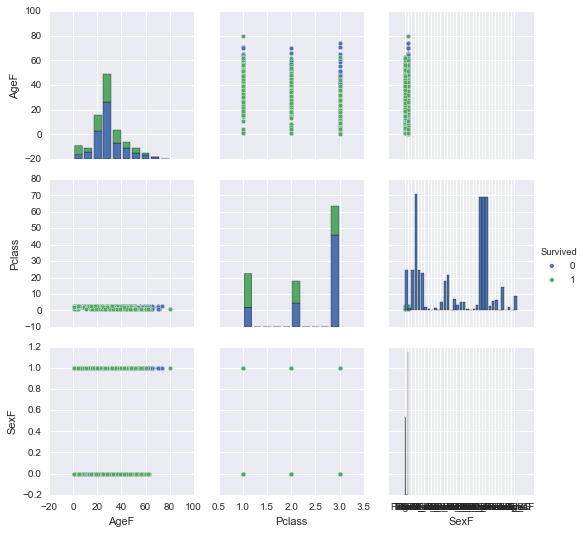

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

pd.set_option('display.width', 256)

# https://www.dataquest.io/course/kaggle-competitions
#
# PassengerId -- A numerical id assigned to each passenger.
# Survived -- Whether the passenger survived (1), or didn't (0). We'll be making predictions for this column.
# Pclass -- The class the passenger was in -- first class (1), second class (2), or third class (3).
# Name -- the name of the passenger.
# Sex -- The gender of the passenger -- male or female.
# Age -- The age of the passenger. Fractional.
# SibSp -- The number of siblings and spouses the passenger had on board.
# Parch -- The number of parents and children the passenger had on board.
# Ticket -- The ticket number of the passenger.
# Fare -- How much the passenger paid for the ticker.
# Cabin -- Which cabin the passenger was in.
# Embarked -- Where the passenger boarded the Titanic.


class DataDigest:

    def __init__(self):
        self.ages = None
        self.fares = None
        self.titles = None
        self.cabins = None
        self.families = None
        self.tickets = None


def get_title(name):
    if pd.isnull(name):
        return "Null"

    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1).lower()
    else:
        return "None"


def get_family(row):
    last_name = row["Name"].split(",")[0]
    if last_name:
        family_size = 1 + row["Parch"] + row["SibSp"]
        if family_size > 3:
            return "{0}_{1}".format(last_name.lower(), family_size)
        else:
            return "nofamily"
    else:
        return "unknown"


def get_index(item, index):
    if pd.isnull(item):
        return -1

    try:
        return index.get_loc(item)
    except KeyError:
        return -1


def munge_data(data, digest):
    # Age
    data["AgeF"] = data.apply(lambda r: digest.ages[r["Sex"]] if pd.isnull(r["Age"]) else r["Age"], axis=1)

    # Fare
    data["FareF"] = data.apply(lambda r: digest.fares[r["Pclass"]] if pd.isnull(r["Fare"]) else r["Fare"], axis=1)

    # Gender
    genders = {"male": 1, "female": 0}
    data["SexF"] = data["Sex"].apply(lambda s: genders.get(s))

    gender_dummies = pd.get_dummies(data["Sex"], prefix="SexD", dummy_na=False)
    data = pd.concat([data, gender_dummies], axis=1)

    # Embarkment
    embarkments = {"U": 0, "S": 1, "C": 2, "Q": 3}
    data["EmbarkedF"] = data["Embarked"].fillna("U").apply(lambda e: embarkments.get(e))

    embarkment_dummies = pd.get_dummies(data["Embarked"], prefix="EmbarkedD", dummy_na=False)
    data = pd.concat([data, embarkment_dummies], axis=1)

    # Relatives
    data["RelativesF"] = data["Parch"] + data["SibSp"]
    data["SingleF"] = data["RelativesF"].apply(lambda r: 1 if r == 0 else 0)

    # Deck
    decks = {"U": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
    data["DeckF"] = data["Cabin"].fillna("U").apply(lambda c: decks.get(c[0], -1))

    deck_dummies = pd.get_dummies(data["Cabin"].fillna("U").apply(lambda c: c[0]), prefix="DeckD", dummy_na=False)
    data = pd.concat([data, deck_dummies], axis=1)

    # Titles
    title_dummies = pd.get_dummies(data["Name"].apply(lambda n: get_title(n)), prefix="TitleD", dummy_na=False)
    data = pd.concat([data, title_dummies], axis=1)

    # Lookups
    data["CabinF"] = data["Cabin"].fillna("unknown").apply(lambda c: get_index(c, digest.cabins))

    data["TitleF"] = data["Name"].apply(lambda n: get_index(get_title(n), digest.titles))

    data["TicketF"] = data["Ticket"].apply(lambda t: get_index(t, digest.tickets))

    data["FamilyF"] = data.apply(lambda r: get_index(get_family(r), digest.families), axis=1)

    # Stat
    age_bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90]
    data["AgeR"] = pd.cut(data["Age"].fillna(-1), bins=age_bins).astype(object)

    return data


def linear_scorer(estimator, x, y):
    scorer_predictions = estimator.predict(x)

    scorer_predictions[scorer_predictions > 0.5] = 1
    scorer_predictions[scorer_predictions <= 0.5] = 0

    return metrics.accuracy_score(y, scorer_predictions)

# -----------------------------------------------------------------------------
# load
# -----------------------------------------------------------------------------

train_data = pd.read_csv("data/titanic/train.csv")
test_data = pd.read_csv("data/titanic/test.csv")
all_data = pd.concat([train_data, test_data])

# -----------------------------------------------------------------------------
# stat
# -----------------------------------------------------------------------------

print("===== survived by class and sex")
print(train_data.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True))

# -----------------------------------------------------------------------------
# describe
# -----------------------------------------------------------------------------

describe_fields = ["Age", "Fare", "Pclass", "SibSp", "Parch"]

print("===== train: males")
print(train_data[train_data["Sex"] == "male"][describe_fields].describe())

print("===== test: males")
print(test_data[test_data["Sex"] == "male"][describe_fields].describe())

print("===== train: females")
print(train_data[train_data["Sex"] == "female"][describe_fields].describe())

print("===== test: females")
print(test_data[test_data["Sex"] == "female"][describe_fields].describe())

# -----------------------------------------------------------------------------
# munge
# -----------------------------------------------------------------------------

data_digest = DataDigest()

data_digest.ages = all_data.groupby("Sex")["Age"].median()
data_digest.fares = all_data.groupby("Pclass")["Fare"].median()

titles_trn = pd.Index(train_data["Name"].apply(get_title).unique())
titles_tst = pd.Index(test_data["Name"].apply(get_title).unique())
data_digest.titles = titles_tst

families_trn = pd.Index(train_data.apply(get_family, axis=1).unique())
families_tst = pd.Index(test_data.apply(get_family, axis=1).unique())
data_digest.families = families_tst

cabins_trn = pd.Index(train_data["Cabin"].fillna("unknown").unique())
cabins_tst = pd.Index(test_data["Cabin"].fillna("unknown").unique())
data_digest.cabins = cabins_tst

tickets_trn = pd.Index(train_data["Ticket"].fillna("unknown").unique())
tickets_tst = pd.Index(test_data["Ticket"].fillna("unknown").unique())
data_digest.tickets = tickets_tst

train_data_munged = munge_data(train_data, data_digest)
test_data_munged = munge_data(test_data, data_digest)
all_data_munged = pd.concat([train_data_munged, test_data_munged])

predictors = ["Pclass",
              "AgeF",
              "TitleF",
              "TitleD_mr", "TitleD_mrs", "TitleD_miss", "TitleD_master", "TitleD_ms",
              "TitleD_col", "TitleD_rev", "TitleD_dr",
              "CabinF",
              "DeckF",
              "DeckD_U", "DeckD_A", "DeckD_B", "DeckD_C", "DeckD_D", "DeckD_E", "DeckD_F", "DeckD_G",
              "FamilyF",
              "TicketF",
              "SexF",
              "SexD_male", "SexD_female",
              "EmbarkedF",
              "EmbarkedD_S", "EmbarkedD_C", "EmbarkedD_Q",
              "FareF",
              "SibSp", "Parch",
              "RelativesF",
              "SingleF"]

cv = StratifiedKFold(train_data["Survived"], n_folds=3, shuffle=True, random_state=1)

# -----------------------------------------------------------------------------
# stat 2
# -----------------------------------------------------------------------------

print("===== survived by age")
print(train_data_munged.groupby(["AgeR"])["Survived"].value_counts(normalize=True))

print("===== survived by gender and age")
print(train_data_munged.groupby(["Sex", "AgeR"])["Survived"].value_counts(normalize=True))

print("===== survived by class and age")
print(train_data_munged.groupby(["Pclass", "AgeR"])["Survived"].value_counts(normalize=True))

# -----------------------------------------------------------------------------
# pairplot graph
# -----------------------------------------------------------------------------

sns.pairplot(train_data_munged, vars=["AgeF", "Pclass", "SexF"], hue="Survived", dropna=True)
# sns.plt.show()

# ----------------------------------------------------------------------------
# features graph
# -----------------------------------------------------------------------------

selector = SelectKBest(f_classif, k=5)
selector.fit(train_data_munged[predictors], train_data_munged["Survived"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
# plt.show()

# -----------------------------------------------------------------------------
# scale
# -----------------------------------------------------------------------------

scaler = StandardScaler()
scaler.fit(all_data_munged[predictors])

# scaled
train_data_scaled = scaler.transform(train_data_munged[predictors])
test_data_scaled = scaler.transform(test_data_munged[predictors])

# non-scaled
# train_data_scaled = train_data_munged[predictors]
# test_data_scaled = test_data_munged[predictors]

# -----------------------------------------------------------------------------
# K-neighbourhood
# -----------------------------------------------------------------------------

alg_ngbh = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(alg_ngbh, train_data_scaled, train_data_munged["Survived"], cv=cv, n_jobs=-1)
print("Accuracy (k-neighbors): {}/{}".format(scores.mean(), scores.std()))

# -----------------------------------------------------------------------------
# sgd
# -----------------------------------------------------------------------------

alg_sgd = SGDClassifier(random_state=1)
scores = cross_val_score(alg_sgd, train_data_scaled, train_data_munged["Survived"], cv=cv, n_jobs=-1)
print("Accuracy (sgd): {}/{}".format(scores.mean(), scores.std()))

# -----------------------------------------------------------------------------
# svm
# -----------------------------------------------------------------------------

alg_svm = SVC(C=1.0)
scores = cross_val_score(alg_svm, train_data_scaled, train_data_munged["Survived"], cv=cv, n_jobs=-1)
print("Accuracy (svm): {}/{}".format(scores.mean(), scores.std()))

# -----------------------------------------------------------------------------
# naive bayes
# -----------------------------------------------------------------------------

alg_nbs = GaussianNB()
scores = cross_val_score(alg_nbs, train_data_scaled, train_data_munged["Survived"], cv=cv, n_jobs=-1)
print("Accuracy (naive bayes): {}/{}".format(scores.mean(), scores.std()))

# -----------------------------------------------------------------------------
# linear regression
# -----------------------------------------------------------------------------

alg_lnr = LinearRegression()
scores = cross_val_score(alg_lnr, train_data_scaled, train_data_munged["Survived"], cv=cv, n_jobs=-1,
                         scoring=linear_scorer)
print("Accuracy (linear regression): {}/{}".format(scores.mean(), scores.std()))

# -----------------------------------------------------------------------------
# logistic regression
# -----------------------------------------------------------------------------

alg_log = LogisticRegression(random_state=1)
scores = cross_val_score(alg_log, train_data_scaled, train_data_munged["Survived"], cv=cv, n_jobs=-1,
                         scoring=linear_scorer)
print("Accuracy (logistic regression): {}/{}".format(scores.mean(), scores.std()))

# -----------------------------------------------------------------------------
# random forest simple
# -----------------------------------------------------------------------------

alg_frst = RandomForestClassifier(random_state=1, n_estimators=500, min_samples_split=8, min_samples_leaf=2)
scores = cross_val_score(alg_frst, train_data_scaled, train_data_munged["Survived"], cv=cv, n_jobs=-1)
print("Accuracy (random forest): {}/{}".format(scores.mean(), scores.std()))

# -----------------------------------------------------------------------------
# random forest auto
# -----------------------------------------------------------------------------

alg_frst_model = RandomForestClassifier(random_state=1)
alg_frst_params = [{
    "n_estimators": [350, 400, 450, 500],
    "min_samples_split": [6, 8, 10],
    "min_samples_leaf": [1, 2, 4]
}]
alg_frst_grid = GridSearchCV(alg_frst_model, alg_frst_params, cv=cv, refit=True, verbose=1, n_jobs=-1)
alg_frst_grid.fit(train_data_scaled, train_data_munged["Survived"])
alg_frst_best = alg_frst_grid.best_estimator_
print("Accuracy (random forest auto): {} with params {}"
      .format(alg_frst_grid.best_score_, alg_frst_grid.best_params_))


# -----------------------------------------------------------------------------
# test output
# -----------------------------------------------------------------------------

alg_test = alg_frst_best

alg_test.fit(train_data_scaled, train_data_munged["Survived"])

predictions = alg_test.predict(test_data_scaled)

submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})

submission.to_csv("titanic-submission.csv", index=False)


<strong></strong> Represent the following table using 
a data structure of your choice



<h2 align="center"> Problem 2</h2><br>

<strong><p style="font-size:120%;"></strong> Perform Stacking Ensemble analysis on the Boston Housing Data set. You can use Python, Weka, KNIME or other tool to perform Stacking or write your own version in Python code. Include interesting plots and attribute importance analysis to support the choice of the final model configuration chosen. Any combination of any of the Machine learning algorithms we have covered in the class so far or you are already familiar with is acceptable to be used in the Stacking Ensemble.

In [136]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [137]:
# load data
boston = load_boston()

model = LinearRegression()
model.fit(boston.data, boston.target)

expected = boston.target
predicted = model.predict(boston.data)

print "Linear regression model \n Boston dataset"
print "Mean squared error = %0.3f" % mse(expected, predicted)
print "R2 score = %0.3f" % r2_score(expected, predicted)

Linear regression model 
 Boston dataset
Mean squared error = 21.898
R2 score = 0.741


In [141]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)

ridge.fit(boston.data, boston.target)

expected = boston.target
predicted = ridge.predict(boston.data)

print "Ridge regression model \n Boston dataset"
print "Mean squared error = %0.3f" % mse(expected, predicted)
print "R2 score = %0.3f" % r2_score(expected, predicted)

Ridge regression model 
 Boston dataset
Mean squared error = 21.901
R2 score = 0.741


MSE: 6.4807


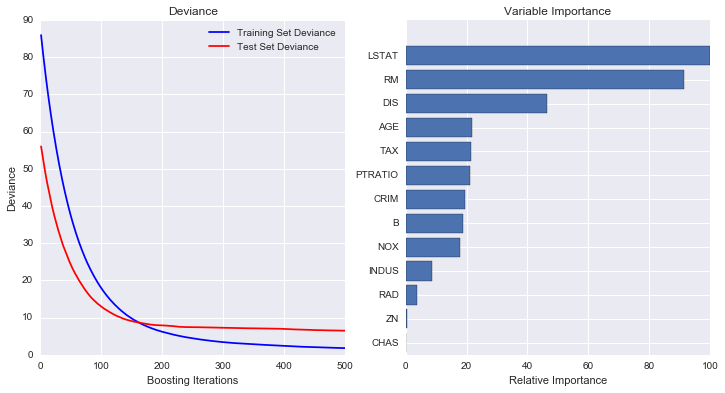

In [145]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

###############################################################################
# Load data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

###############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

###############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

###############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Interesting stacking <br>
https://github.com/dustinstansbury/stacked_generalization